In [136]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [173]:
train = pd.read_csv('data/train.csv')

In [176]:
train.head()
# train['timestamp'] = pd.to_datetime(train['timestamp'])
(train["timestamp"].max(), train["timestamp"].min())
train["timestamp"].value_counts().sort_values(ascending=False)

timestamp
1425008573    1
1425017573    1
1425017273    1
1425009173    1
1425009473    1
             ..
1429755173    1
1429755473    1
1429755773    1
1429756073    1
1429757273    1
Name: count, Length: 15830, dtype: int64

<Axes: xlabel='timestamp', ylabel='predicted'>

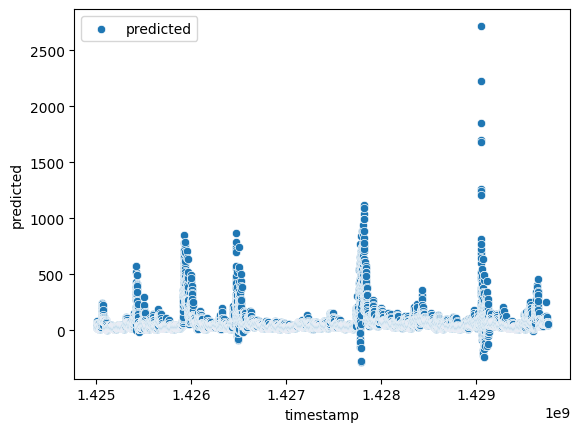

In [166]:
sns.scatterplot(data=train, x='timestamp', y='predicted', label='predicted', marker='o')
# sns.lineplot(data=train, x='timestamp', y='value', label='value', marker='s')


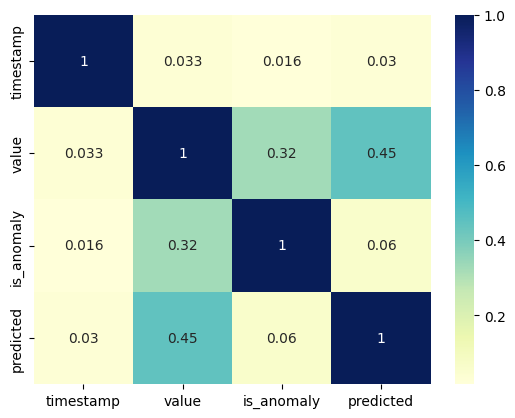

In [139]:
sns.heatmap(train.corr(), annot = True, cmap="YlGnBu")
plt.show()

(15830, 3)


In [141]:
label.value_counts()

is_anomaly
False    15054
True       776
Name: count, dtype: int64

In [142]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
label=train['is_anomaly']
data=train.drop(['is_anomaly'],axis=1)
x_train,x_val,y_train, y_val =train_test_split(data,label,test_size=0.3, random_state=42, stratify=label)
    


In [143]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, balanced_accuracy_score,  precision_recall_curve, auc
def eval(y_val, pred, pred_proba=None):
    print(classification_report(y_val,pred))
    print(roc_auc_score(y_val, pred))
    print(confusion_matrix(y_val, pred))
    precision, recall, _ = precision_recall_curve(y_val, pred)
    print(precision)
    print(recall)
    pr_auc = auc(recall, precision)
    print(f"auc:{pr_auc}")
    print(balanced_accuracy_score(y_val, pred))


In [144]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(
    class_weight='balanced',  # Automatically balances classes
    classes=np.unique(y_train),  # List of unique classes
    y=y_train  # Target values
)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))
print("Class Weights:", class_weight_dict)
sample_weights = np.array([class_weight_dict[class_label] for class_label in y_train])

Class Weights: {False: 0.5257639020687037, True: 10.203499079189687}


In [145]:
class_weights

array([ 0.5257639 , 10.20349908])

In [146]:
from xgboost import XGBClassifier
clf=XGBClassifier(learning_rate=1, n_estimators=1300,eta = 0.7, 
    max_depth= 3,  
    objective= 'binary:logistic',  
    num_class= 1)

clf.fit(x_train,y_train)
# pred=clf.predict_proba(x_val)
pred=clf.predict(x_val)
pred_proba=clf.predict_proba(x_val)
eval(y_val, pred)

              precision    recall  f1-score   support

       False       0.98      0.99      0.99      4516
        True       0.79      0.70      0.74       233

    accuracy                           0.98      4749
   macro avg       0.89      0.84      0.86      4749
weighted avg       0.97      0.98      0.98      4749

0.8427679172194619
[[4472   44]
 [  71  162]]
[0.04906296 0.78640777 1.        ]
[1.         0.69527897 0.        ]
auc:0.7483186264227284
0.842767917219462


In [147]:
from xgboost import XGBClassifier
clf=XGBClassifier(learning_rate=1, n_estimators=1300,eta = 0.7, 
    max_depth= 3,  
    objective= 'binary:logistic',  
    num_class= 1)

clf.fit(x_train,y_train, sample_weight=sample_weights)
# pred=clf.predict_proba(x_val)
pred=clf.predict(x_val)
eval(y_val, pred)

              precision    recall  f1-score   support

       False       0.99      0.99      0.99      4516
        True       0.77      0.77      0.77       233

    accuracy                           0.98      4749
   macro avg       0.88      0.88      0.88      4749
weighted avg       0.98      0.98      0.98      4749

0.8781414294240412
[[4462   54]
 [  54  179]]
[0.04906296 0.76824034 1.        ]
[1.         0.76824034 0.        ]
auc:0.7739257508018403
0.8781414294240412


In [157]:
from xgboost import XGBClassifier
clf=XGBClassifier(learning_rate=1, n_estimators=1300,eta = 0.7, 
    max_depth= 3,  
    objective= 'binary:logistic',  
    # use_label_encoder=False,  # Avoid warnings
    enable_categorical=True,
    num_class= 1)

clf.fit(x_features_train,y_train, sample_weight=sample_weights)
# pred=clf.predict_proba(x_val)
pred=clf.predict(x_features_val)
eval(y_val, pred)

              precision    recall  f1-score   support

       False       0.95      0.89      0.92      4516
        True       0.04      0.08      0.05       233

    accuracy                           0.85      4749
   macro avg       0.49      0.48      0.48      4749
weighted avg       0.90      0.85      0.88      4749

0.48470721174498305
[[4029  487]
 [ 215   18]]
[0.04906296 0.03564356 1.        ]
[1.         0.07725322 0.        ]
auc:0.0790847361138555
0.48470721174498305


In [158]:
x_features_train

,value,predicted,DAY(timestamp),HOUR(timestamp),IS_WEEKEND(timestamp),MONTH(timestamp),WEEKDAY(timestamp)
index,,,,,,,
3494,42,44.072500,1,0,False,1,3
1513,41,81.405120,1,0,False,1,3
6897,61,39.950367,1,0,False,1,3
6163,49,40.859787,1,0,False,1,3
5813,41,31.864576,1,0,False,1,3
...,...,...,...,...,...,...,...
3901,48,53.451565,1,0,False,1,3
5491,44,53.624115,1,0,False,1,3
455,45,59.752296,1,0,False,1,3


In [72]:
from xgboost import XGBClassifier
clf=XGBClassifier(learning_rate=0.01, n_estimators=1300,eta = 0.7, 
    max_depth= 3,  
    objective= 'binary:logistic',  
    num_class= 1)

clf.fit(x_train,y_train, sample_weight=sample_weights)
# pred=clf.predict_proba(x_val)
pred=clf.predict(x_val)
eval(y_val, pred)

              precision    recall  f1-score   support

       False       0.99      0.95      0.97      4516
        True       0.47      0.90      0.62       233

    accuracy                           0.95      4749
   macro avg       0.73      0.92      0.79      4749
weighted avg       0.97      0.95      0.95      4749

0.9222578186476696
[[4279  237]
 [  24  209]]
[0.04906296 0.46860987 1.        ]
[1.         0.89699571 0.        ]
0.6853296345701019
0.9222578186476695


In [75]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)


In [85]:
from xgboost import XGBClassifier
class_weights = compute_class_weight(
    class_weight='balanced',  # Automatically balances classes
    classes=np.unique(y_train_resampled),  # List of unique classes
    y=y_train  # Target values
)
class_weight_dict = dict(zip(np.unique(y_train_resampled), class_weights))
print("Class Weights:", class_weight_dict)
sample_weights = np.array([class_weight_dict[class_label] for class_label in y_train_resampled])
clf=XGBClassifier(learning_rate=0.01, n_estimators=1300,eta = 0.7, 
    max_depth= 3,  
    objective= 'binary:logistic',  
    num_class= 1)

clf.fit(x_train_resampled,y_train_resampled)
# pred=clf.predict_proba(x_val)
pred=clf.predict(x_val)
eval(y_val, pred)

Class Weights: {False: 0.5257639020687037, True: 10.203499079189687}
              precision    recall  f1-score   support

       False       0.99      0.96      0.97      4516
        True       0.49      0.84      0.62       233

    accuracy                           0.95      4749
   macro avg       0.74      0.90      0.80      4749
weighted avg       0.97      0.95      0.96      4749

0.8981252162078941
[[4313  203]
 [  37  196]]
[0.04906296 0.49122807 1.        ]
[1.         0.84120172 0.        ]
0.6701104504161779
0.8981252162078941


In [77]:
x_train_resampled

,timestamp,value,predicted
0,1427592473,37,32.511856
1,1426530173,193,270.177670
2,1425465173,20,21.028238
3,1429060673,169,297.661740
4,1425437573,47,102.022420
...,...,...,...
21071,1427092984,143,30.948341
21072,1425230084,72,34.134551
21073,1426990972,85,21.463684
21074,1425724511,52,25.001945


In [78]:
y_train_resampled

0        False
1        False
2        False
3        False
4        False
         ...  
21071     True
21072     True
21073     True
21074     True
21075     True
Name: is_anomaly, Length: 21076, dtype: bool

In [80]:
sample_weights

array([0.5257639, 0.5257639, 0.5257639, ..., 0.5257639, 0.5257639,
       0.5257639])

In [102]:
from lightgbm import LGBMClassifier
model = LGBMClassifier(
    objective='binary',
    n_estimators=100,
    max_depth=10,
    learning_rate=0.1,
    class_weight='balanced',  # Automatically handle class imbalance
    random_state=42
)
model.fit(x_train, y_train)
pred = model.predict(x_val)
eval(y_val, pred)

[LightGBM] [Info] Number of positive: 543, number of negative: 10538
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000341 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 11081, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
              precision    recall  f1-score   support

       False       0.99      0.97      0.98      4516
        True       0.61      0.84      0.71       233

    accuracy                           0.97      4749
   macro avg       0.80      0.91      0.84      4749
weighted avg       0.97      0.97      0.97      4749

0.9066504597862821
[[4390  126]
 [  37  196]]
[0.04906296 0.60869565 1.        ]
[1.         0.84120172 0.        ]
0.7288442414154152
0.9066504597862821


In [103]:
train.columns

Index(['timestamp', 'value', 'is_anomaly', 'predicted'], dtype='object')

In [148]:
import featuretools as ft
def get_features(x):
    x['timestamp'] = pd.to_datetime(x['timestamp'])
    es = ft.EntitySet(id="data")
    
    # Add the DataFrame to the EntitySet
    es = es.add_dataframe(
        dataframe_name="observations",  # Name of the table
        dataframe=x,
        index="index",  # A unique index column
        make_index=True,  # Create a unique index automatically
        time_index="timestamp"  # Use 'timestamp' as the time index
    )
    features, feature_defs = ft.dfs(
        entityset=es,
        target_dataframe_name="observations",  # Updated parameter for target dataframe
        agg_primitives=["mean", "sum", "std", "count"],  # Aggregation primitives
        trans_primitives=["month", "day", "hour", "weekday", "is_weekend"],  # Transformation primitives
    )
    return features
x_features_train = get_features(x_train)
x_features_val = get_features(x_val)

/Users/ozge/PycharmProjects/ozge/kaggle/.env/lib/python3.9/site-packages/featuretools/synthesis/deep_feature_synthesis.py:169: UserWarning: Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn(
/Users/ozge/PycharmProjects/ozge/kaggle/.env/lib/python3.9/site-packages/featuretools/synthesis/dfs.py:321: UnusedPrimitiveWarning: Some specified primitives were not used during DFS:
  agg_primitives: ['count', 'mean', 'std', 'sum']
This may be caused by a using a value of max_depth that is too small, not setting interesting values, or it may indicate no compatible columns for the primitive were found in the data. If the DFS call contained multiple instances of a primitive in the list above, none of them were used.
  warnings.warn(warning_msg, UnusedPrimitiveWarning)
/Users/ozge/PycharmProjects/ozge/kaggle/.env/lib/python3.9/site-packages/featuretools/synthesis/deep_feature_synthesis.py:169: UserWarning: Only one dataframe in entityset

,value,predicted,DAY(timestamp),HOUR(timestamp),IS_WEEKEND(timestamp),MONTH(timestamp),WEEKDAY(timestamp)
index,,,,,,,
3267,41,50.709390,1,0,False,1,3
3722,44,35.350160,1,0,False,1,3
2596,27,27.713638,1,0,False,1,3
1652,37,41.545710,1,0,False,1,3
2794,36,38.743620,1,0,False,1,3
...,...,...,...,...,...,...,...
1435,48,67.436970,1,0,False,1,3
3739,71,57.333534,1,0,False,1,3
3636,48,70.396020,1,0,False,1,3


In [122]:
x_features

In [134]:
from lightgbm import LGBMClassifier
categorical_features = ['DAY(timestamp)', 'HOUR(timestamp)',
       'IS_WEEKEND(timestamp)', 'MONTH(timestamp)', 'WEEKDAY(timestamp)']
for c in categorical_features:
    x_features_val.rename(columns={c: f"name_{c}"}, inplace=True)
    x_features_train.rename(columns={c: f"name_{c}"}, inplace=True)
model = LGBMClassifier(
    # categorical_features = categorical_features,
    objective='binary',
    n_estimators=100,
    max_depth=10,
    learning_rate=0.1,
    class_weight='balanced',  # Automatically handle class imbalance
    random_state=42,
)
model.fit(x_features_train, y_train)
pred = model.predict(x_features_val)
eval(y_val, pred)

[LightGBM] [Info] Number of positive: 543, number of negative: 10538
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000244 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 11081, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
              precision    recall  f1-score   support

     

In [129]:
x_features_train

,value,is_anomaly,predicted,DAY(timestamp),HOUR(timestamp),IS_WEEKEND(timestamp),MONTH(timestamp),WEEKDAY(timestamp)
index,,,,,,,,
0,42,False,44.072500,1,0,False,1,3
1,41,False,50.709390,1,0,False,1,3
2,41,False,81.405120,1,0,False,1,3
3,61,False,39.950367,1,0,False,1,3
4,44,False,35.350160,1,0,False,1,3
...,...,...,...,...,...,...,...,...
15825,44,False,53.624115,1,0,False,1,3
15826,45,False,59.752296,1,0,False,1,3
15827,48,False,52.147630,1,0,False,1,3


In [153]:
x_features_train['WEEKDAY(timestamp)']

index
3494    3
1513    3
6897    3
6163    3
5813    3
       ..
3901    3
5491    3
455     3
4507    3
1065    3
Name: WEEKDAY(timestamp), Length: 11081, dtype: category
Categories (7, int64): [0 < 1 < 2 < 3 < 4 < 5 < 6]

In [152]:
x_features_train.columns

Index(['value', 'predicted', 'DAY(timestamp)', 'HOUR(timestamp)',
       'IS_WEEKEND(timestamp)', 'MONTH(timestamp)', 'WEEKDAY(timestamp)'],
      dtype='object')